In [1]:
import os
import tensorflow as tf
from gan.CGAN import CGanNet
import tensorflow_datasets as tfds
import numpy as np

In [2]:
BATCH_SIZE = 64
IMAGE_WIDTH = 112
IMAGE_HEIGHT = 112

In [3]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
# Load and prepare dataset

(training_set, validation_set), dataset_info = tfds.load(
    'oxford_flowers102',
    split=['test', 'train'],
    with_info=True,
    as_supervised=True,
)

num_training_examples = 0
for example in training_set:
    num_training_examples += 1

def format_image(image, label):
    image = tf.image.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))/255.0
    return image, label

train_batches = training_set.shuffle(num_training_examples//4).map(format_image)

num_classes = dataset_info.features['label'].num_classes
train_batches_images = np.array([_[0] for _ in train_batches])
train_batches_labels = np.array([_[1] for _ in train_batches])

In [5]:
cgan = CGanNet(batch_size=BATCH_SIZE,
          batches_per_epoch=40,
          image_width=IMAGE_WIDTH,
          image_height=IMAGE_HEIGHT,
          number_of_channels=3,
          latent_dimension=100,
          training_data=train_batches_images,
          labels_data=train_batches_labels,
          number_of_classes=num_classes
)

In [6]:
#cgan.clear_files_structure()

In [7]:
cgan.define_discriminator()
cgan.define_generator()
cgan.define_gan()
cgan.create_files_structure()

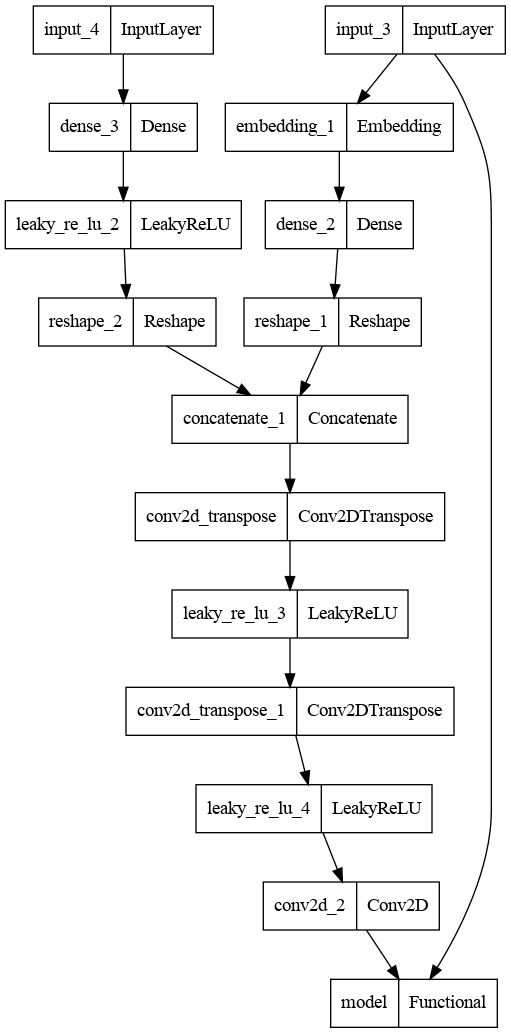

In [13]:
tf.keras.utils.plot_model(cgan._gan)

In [ ]:
#cgan.train(number_of_epochs=1, load_past_model=False)
#cgan.plot_loss()

Dataset size: 6149
Batches per epoch: 40
----> Load epoch number: 1300 from file .epoch
----> Epoch: 1301
40/40 [==============================] - 24s 390ms/step

D_real_loss: 1.3724932670593262 D_fake_loss: 1.366685390472412 G_loss: 1.4473403692245483
D_real_acc: 0.4375 D_fake_acc: 0.4375
----> Epoch: 1302
40/40 [==============================] - 16s 391ms/step

D_real_loss: 1.1559967994689941 D_fake_loss: 0.9652194380760193 G_loss: 1.6964244842529297
D_real_acc: 0.53125 D_fake_acc: 0.59375
----> Epoch: 1303
40/40 [==============================] - 16s 394ms/step

D_real_loss: 1.7364071607589722 D_fake_loss: 0.5871133804321289 G_loss: 3.5931308269500732
D_real_acc: 0.3125 D_fake_acc: 0.75
----> Epoch: 1304
40/40 [==============================] - 17s 414ms/step

D_real_loss: 1.5242679119110107 D_fake_loss: 1.0724732875823975 G_loss: 2.2765603065490723
D_real_acc: 0.28125 D_fake_acc: 0.40625
----> Epoch: 1305
40/40 [==============================] - 15s 384ms/step

D_real_loss: 0.84398

----> Load epoch number: 1400 from file .epoch


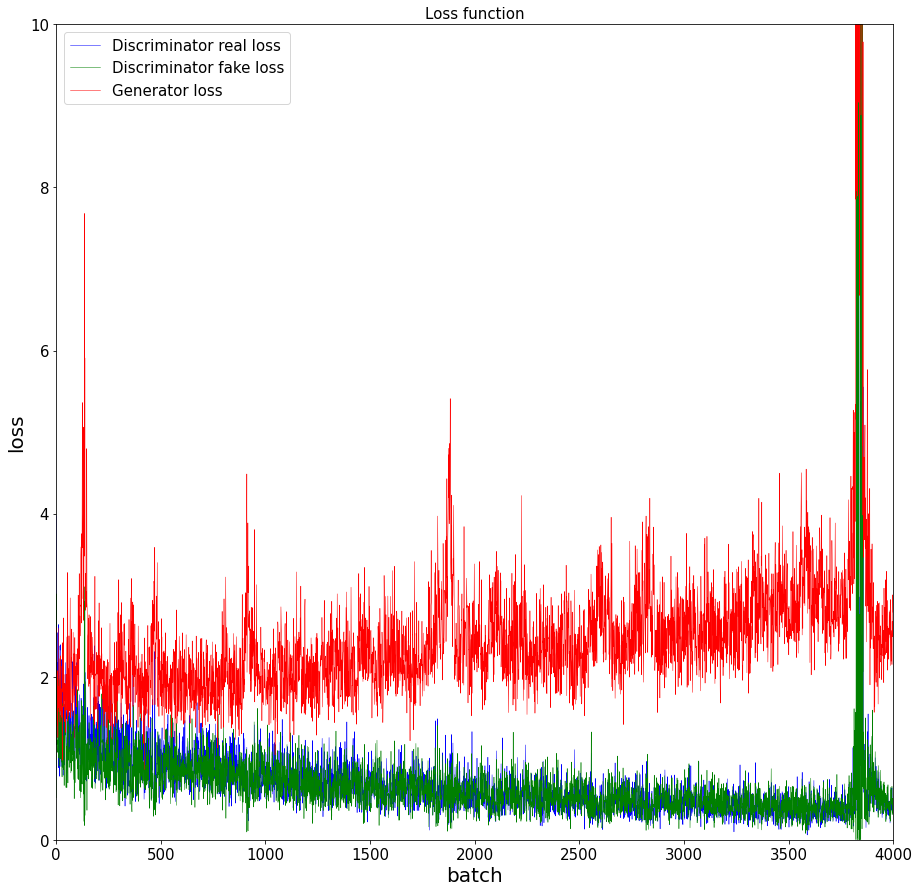

In [7]:
cgan.train(number_of_epochs=100, load_past_model=True)
cgan.plot_loss()